### Importing the Packages 

If you don't have the mne package, run in your terminal "pip install mne" 

In [2]:
import os

import pandas as pd
import numpy as np
import seaborn as sns
import scipy

import mne
import requests 

from tqdm import tqdm
from glob import glob
from matplotlib import pyplot as plt
from statsmodels.stats.weightstats import ttest_ind

## Getting the Data

The code below is provided from the developer that whom conducted the study

In [2]:
sns.set_style('white')
sns.set_context('poster')

def download_url(url, save_path, chunk_size = 128):
    r = requests.get(url, stream = True)
    
    with open(save_path, 'wb') as fd:
        for chunk in tqdm(r.iter_content(chunk_size=chunk_size),
                          desc = f'downloading {save_path.split("/")[-1]} ...'):
            fd.write(chunk)

**Note the following:**

- Line 3 is the location the csv file 'available_subjects.csv'
- Line 5 is the desired location the .egg, .vmrk, .vhrk files will be downloaded, if the folder doesn't existed the folder will be made
- Line 18 is a conditional statement to no repeat downloads, comment it out once, then add it back after. 

In [3]:
if __name__ == '__main__':
    # download the data if not
    dataframe_dir   = '../Nap EEG/data'
    df              = pd.read_csv(os.path.join(dataframe_dir,'available_subjects.csv'))
    EEG_dir         = '../Nap EEG/data' #download location
    annotation_dir  = '../annotations'
    for f in [EEG_dir,annotation_dir]:
        if not os.path.exists(f):
            os.mkdir(f)
    
    for (sub,day),row in df.groupby(['sub','day']):
        
        url_eeg         = row['link'].values[0] #list with the len 
        url_vmrk        = row['link'].values[1]
        url_vhdr        = row['link'].values[2]
        url_annotation  = row['annotation_file_link'].values[0]
        
        if len(os.path.join(EEG_dir)) < 1: #remove this if statement to download that data once
    
            for url in [url_eeg,url_vmrk,url_vhdr]: #nested for loop
                    download_url(url,
                                 os.path.join(EEG_dir,url.split('/')[-1],))

            download_url(url_annotation,
                         os.path.join(annotation_dir,
                                      f'suj{sub}_day{day}_annotations.txt'))

In [25]:
dataframe = '../Nap EEG/data'
df = pd.read_csv(os.path.join(dataframe,'NapEEGBehavior.csv'))

df

,Subject ID,Age,Sex,L2 WM,L2 REC1,L2 REC2,L5 WM,L5 REC1,L5 REC2
0,11,42,Male,95.9,83.0,78.0,95.0,86.0,73.0
1,12,19,Male,98.0,85.0,76.0,87.5,61.0,62.0
2,13,27,Male,78.6,62.0,64.0,70.0,59.0,60.0
3,14,18,Male,84.7,65.0,70.0,75.0,58.0,65.0
4,15,23,Female,95.9,88.0,86.0,95.0,76.0,73.0
5,16,35,Male,99.0,79.0,70.0,100.0,81.0,74.0
6,17,21,Male,97.0,84.0,84.0,97.5,72.0,69.0
7,18,19,Female,93.9,76.0,65.0,85.0,75.0,60.0
8,19,26,Male,95.0,69.0,72.0,97.5,78.0,77.0
9,20,18,Male,99.0,86.0,76.0,100.0,80.0,81.0


### Hypothesis being test is:

**Null hypothesis** $(H0): ud = 0$, which translates to the mean difference between Load # Recognition 1 and Load # Recognition 2 is equal to 0.

**Alternative hypothesis** $(H1): ud ≠ 0$, which translates to the mean difference between Load # Recognition 1 and Load # Recognition 2 is not equal to 0.

If the p-value is less than 0.05, one can reject the null hypothesis.

In [ ]:
sns.displot(penguins, x="flipper_length_mm", kind="kde")

In [7]:
for col in df:
    
    if df[col].dtypes == 'float64':
        
         #ax = df.plot.kde()
        
        median = df[col].median()
        
        print(col, ':', median)
        
        mean = df[col].mean()
        
        print(col, ':', mean)

#ax = df.plot.kde()

L2 WM : 96.5
L2 WM : 93.15
L2 REC1 : 82.0
L2 REC1 : 76.5
L2 REC2 : 74.5
L2 REC2 : 69.9
L5 WM : 95.0
L5 WM : 89.5
L5 REC1 : 73.5
L5 REC1 : 70.75
L5 REC2 : 72.5
L5 REC2 : 69.25


In [71]:
scipy.stats.shapiro(df['L2 REC1'])


ShapiroResult(statistic=0.6605408191680908, pvalue=1.3370093256526161e-05)

In [61]:
scipy.stats.shapiro(df['L2 REC2'])

ShapiroResult(statistic=0.7101165056228638, pvalue=5.192443495616317e-05)

In [67]:
scipy.stats.ttest_rel(df['L2 REC1'], df['L2 REC2']) 

Ttest_relResult(statistic=2.2010299626032395, pvalue=0.040297327407675915)

In [72]:
scipy.stats.ttest_rel(df['L5 REC1'], df['L5 REC2'])

Ttest_relResult(statistic=1.075624877390172, pvalue=0.2955646830923241)

### Wilcoxon signed-rank test

Since the data is left skwed since most subject did well on the task, a Wilcoxon signed-rank test might be more accurate since the most scores are between 60% to 100%. The median is a better representation

In [8]:
scipy.stats.wilcoxon(df['L2 REC1'], df['L2 REC2'])

/opt/conda/lib/python3.9/site-packages/scipy/stats/morestats.py:3141: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


WilcoxonResult(statistic=19.5, pvalue=0.0039923809637546015)

In [9]:
scipy.stats.wilcoxon(df['L5 REC1'], df['L5 REC2'])

WilcoxonResult(statistic=88.0, pvalue=0.5458755493164062)

In [26]:
L2_Delta = df['L2 REC2'] - df['L2 REC1']

In [27]:
L5_Delta = df['L5 REC2'] - df['L5 REC1']

In [28]:
df['L2 Delta'] = L2_Delta
df['L5 Delta'] = L5_Delta

In [48]:
df

,Subject ID,Age,Sex,L2 WM,L2 REC1,L2 REC2,L5 WM,L5 REC1,L5 REC2,L2 Delta,L5 Delta
0,11,42,Male,95.9,83.0,78.0,95.0,86.0,73.0,-5.0,-13.0
1,12,19,Male,98.0,85.0,76.0,87.5,61.0,62.0,-9.0,1.0
2,13,27,Male,78.6,62.0,64.0,70.0,59.0,60.0,2.0,1.0
3,14,18,Male,84.7,65.0,70.0,75.0,58.0,65.0,5.0,7.0
4,15,23,Female,95.9,88.0,86.0,95.0,76.0,73.0,-2.0,-3.0
5,16,35,Male,99.0,79.0,70.0,100.0,81.0,74.0,-9.0,-7.0
6,17,21,Male,97.0,84.0,84.0,97.5,72.0,69.0,0.0,-3.0
7,18,19,Female,93.9,76.0,65.0,85.0,75.0,60.0,-11.0,-15.0
8,19,26,Male,95.0,69.0,72.0,97.5,78.0,77.0,3.0,-1.0
9,20,18,Male,99.0,86.0,76.0,100.0,80.0,81.0,-10.0,1.0


-6.6

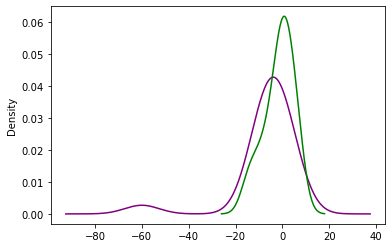

In [34]:
df['L2 Delta'].plot.kde(color = 'purple')
df['L5 Delta'].plot.kde(color = 'green')

df['L2 Delta'].mean()

In [44]:
df2 = df.drop([10, 14], axis = 0)

In [45]:
df2['L2 Delta'].mean()

-3.9444444444444446

In [46]:
df2['L5 Delta'].mean()

-0.9444444444444444

In [47]:
df2

,Subject ID,Age,Sex,L2 WM,L2 REC1,L2 REC2,L5 WM,L5 REC1,L5 REC2,L2 Delta,L5 Delta
0,11,42,Male,95.9,83.0,78.0,95.0,86.0,73.0,-5.0,-13.0
1,12,19,Male,98.0,85.0,76.0,87.5,61.0,62.0,-9.0,1.0
2,13,27,Male,78.6,62.0,64.0,70.0,59.0,60.0,2.0,1.0
3,14,18,Male,84.7,65.0,70.0,75.0,58.0,65.0,5.0,7.0
4,15,23,Female,95.9,88.0,86.0,95.0,76.0,73.0,-2.0,-3.0
5,16,35,Male,99.0,79.0,70.0,100.0,81.0,74.0,-9.0,-7.0
6,17,21,Male,97.0,84.0,84.0,97.5,72.0,69.0,0.0,-3.0
7,18,19,Female,93.9,76.0,65.0,85.0,75.0,60.0,-11.0,-15.0
8,19,26,Male,95.0,69.0,72.0,97.5,78.0,77.0,3.0,-1.0
9,20,18,Male,99.0,86.0,76.0,100.0,80.0,81.0,-10.0,1.0


In [55]:
scipy.stats.ttest_rel(df2['L2 Delta'], df2['L5 Delta'])

Ttest_relResult(statistic=-1.9639610121239313, pvalue=0.06610205619157077)

<AxesSubplot:ylabel='Density'>

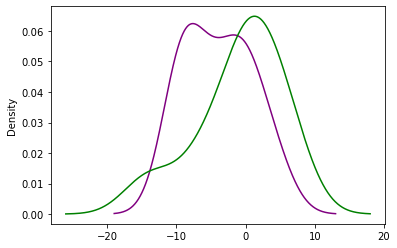

In [56]:
df2['L2 Delta'].plot.kde(color = 'purple')
df2['L5 Delta'].plot.kde(color = 'green')

# df['L2 Delta'].plot.kde(color = 'blue')
# df['L5 Delta'].plot.kde(color = 'red')


In [60]:
scipy.stats.ttest_1samp(df2['L5 Delta'], popmean = 0)

Ttest_1sampResult(statistic=-0.6435951002491129, pvalue=0.5284256049193196)